Mean Squared Error: 0.5688142529229536
R-squared: 0.5449381659234664
Coefficient: 0.10696370685268658
Intercept: 0.925235558557056


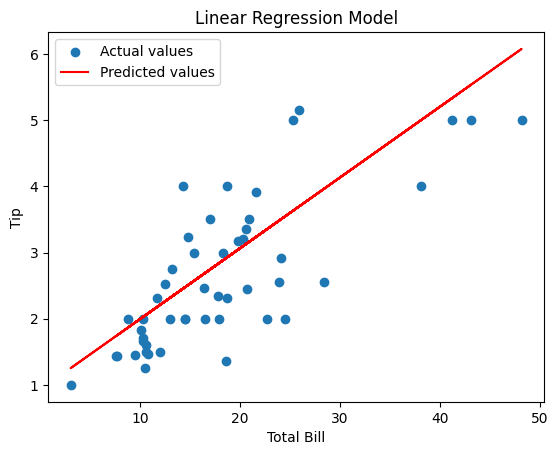

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('tip.csv')

# Clean the column names if needed
data.columns = data.columns.str.strip()

# Convert relevant columns to numeric (total_bill and tip)
data['total_bill'] = pd.to_numeric(data['total_bill'], errors='coerce')
data['tip'] = pd.to_numeric(data['tip'], errors='coerce')

# Drop any rows with missing values in 'total_bill' or 'tip'
data = data.dropna(subset=['total_bill', 'tip'])

# Define the feature (X) and target (y)
X = data[['total_bill']]
y = data['tip']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Plot the data and the regression line
plt.scatter(X_test, y_test, label='Actual values')
plt.plot(X_test, y_pred, label='Predicted values', color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression Model')
plt.legend()
plt.show()